<a href="https://colab.research.google.com/github/LauraPazGOT/Juan_Store-AluraLatam/blob/main/ChallengeTienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### **1. Análisis de facturación**

In [52]:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


#### Ingreso total por cada tienda.

In [53]:
ingreso_tienda = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print("Ingresos totales de la Tienda 1:", ingreso_tienda)
print("Ingresos totales de la Tienda 2:", ingreso_tienda2)
print("Ingresos totales de la Tienda 3:", ingreso_tienda3)
print("Ingresos totales de la Tienda 4:", ingreso_tienda4)

Ingresos totales de la Tienda 1: 1150880400.0
Ingresos totales de la Tienda 2: 1116343500.0
Ingresos totales de la Tienda 3: 1098019600.0
Ingresos totales de la Tienda 4: 1038375700.0


In [54]:
df_ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingresos": [ingreso_tienda, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

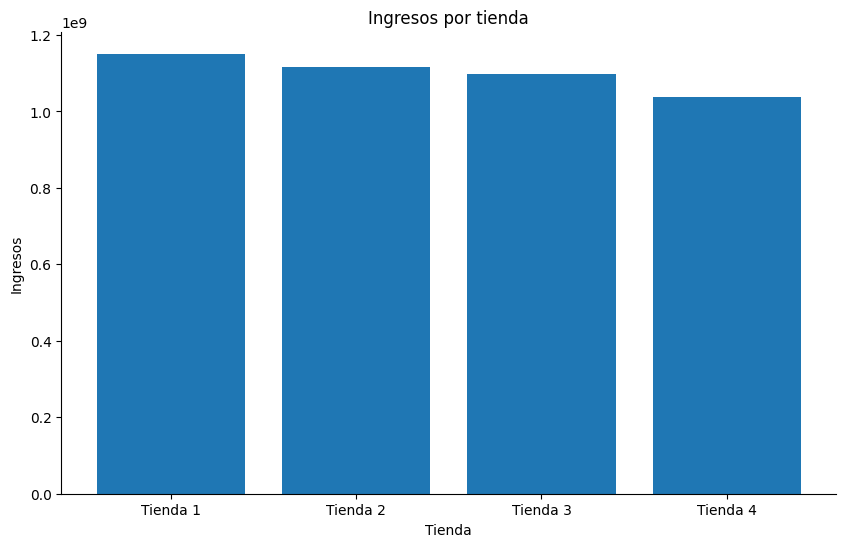

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingresos"])

plt.title("Ingresos por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.xticks(rotation=0)
plt.gca().spines[['top','right']].set_visible(False)

plt.show()

### **2. Ventas por categoría**

In [56]:
ventas_por_categoria = {
    "Tienda 1": tienda.groupby("Categoría del Producto")["Precio"].sum(),
    "Tienda 2": tienda2.groupby("Categoría del Producto")["Precio"].sum(),
    "Tienda 3": tienda3.groupby("Categoría del Producto")["Precio"].sum(),
    "Tienda 4": tienda4.groupby("Categoría del Producto")["Precio"].sum(),
}

ventas_por_categoria

{'Tienda 1': Categoría del Producto
 Artículos para el hogar     12698400.0
 Deportes y diversión        39290000.0
 Electrodomésticos          363685200.0
 Electrónicos               429493500.0
 Instrumentos musicales      91299000.0
 Juguetes                    17995700.0
 Libros                       8784900.0
 Muebles                    187633700.0
 Name: Precio, dtype: float64,
 'Tienda 2': Categoría del Producto
 Artículos para el hogar     14746900.0
 Deportes y diversión        34744500.0
 Electrodomésticos          348567800.0
 Electrónicos               410831100.0
 Instrumentos musicales     104990300.0
 Juguetes                    15945400.0
 Libros                      10091200.0
 Muebles                    176426300.0
 Name: Precio, dtype: float64,
 'Tienda 3': Categoría del Producto
 Artículos para el hogar     15060000.0
 Deportes y diversión        35593100.0
 Electrodomésticos          329237900.0
 Electrónicos               410775800.0
 Instrumentos musicales      7

### **3. Calificacion promedio de la tienda**

In [57]:
calificacion_tienda = tienda["Calificación"].mean()
calificacion_tienda2 = tienda2["Calificación"].mean()
calificacion_tienda3 = tienda3["Calificación"].mean()
calificacion_tienda4 = tienda4["Calificación"].mean()

print("Calificación Promedio Tienda 1:", calificacion_tienda)
print("Calificación Promedio Tienda 2:", calificacion_tienda2)
print("Calificación Promedio Tienda 3:", calificacion_tienda3)
print("Calificación Promedio Tienda 4:", calificacion_tienda4)

Calificación Promedio Tienda 1: 3.976685036032217
Calificación Promedio Tienda 2: 4.037303942348453
Calificación Promedio Tienda 3: 4.048325561678677
Calificación Promedio Tienda 4: 3.9957591178965224


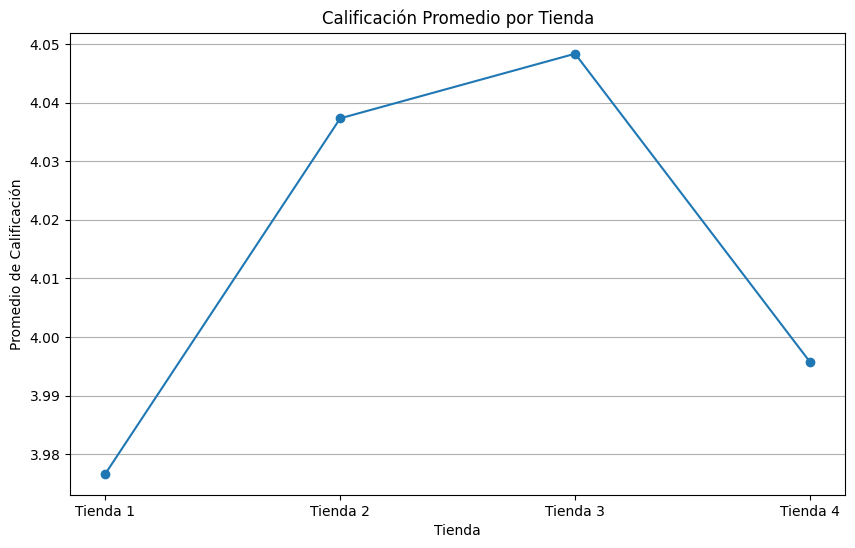

In [58]:
promedios = [
    tienda["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

plt.figure(figsize=(10,6))
plt.plot(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], promedios, marker='o')
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Promedio de Calificación")
plt.xlabel("Tienda")
plt.grid(axis='y')
plt.show()

### **4. Productos más y menos vendidos**

In [59]:
# Productos más vendidos por tienda:

tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(tiendas, start=1):
    producto = t["Producto"].value_counts().idxmax()
    cantidad = t["Producto"].value_counts().max()
    print(f"Producto más vendido en Tienda {i}: {producto} (Cantidad: {cantidad})")


Producto más vendido en Tienda 1: Microondas (Cantidad: 60)
Producto más vendido en Tienda 2: Iniciando en programación (Cantidad: 65)
Producto más vendido en Tienda 3: Kit de bancas (Cantidad: 57)
Producto más vendido en Tienda 4: Cama box (Cantidad: 62)


In [60]:
# Producto menos vendido por tienda:

tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(tiendas, start=1):
    producto = t["Producto"].value_counts().idxmin()
    cantidad = t["Producto"].value_counts().min()
    print(f"Producto menos vendido en Tienda {i}: {producto} (Cantidad: {cantidad})")

Producto menos vendido en Tienda 1: Auriculares con micrófono (Cantidad: 33)
Producto menos vendido en Tienda 2: Juego de mesa (Cantidad: 32)
Producto menos vendido en Tienda 3: Bloques de construcción (Cantidad: 35)
Producto menos vendido en Tienda 4: Guitarra eléctrica (Cantidad: 33)


### **5. Envío promedio por tienda.**

In [61]:
envio_tienda = tienda["Costo de envío"].mean()
envio_tienda2 = tienda2["Costo de envío"].mean()
envio_tienda3 = tienda3["Costo de envío"].mean()
envio_tienda4 = tienda4["Costo de envío"].mean()

print("Costo de envío promedio en Tienda 1:", envio_tienda)
print("Costo de envío promedio en Tienda 2:", envio_tienda2)
print("Costo de envío promedio en Tienda 3:", envio_tienda3)
print("Costo de envío promedio en Tienda 4:", envio_tienda4)

Costo de envío promedio en Tienda 1: 26018.60958033065
Costo de envío promedio en Tienda 2: 25216.235693090293
Costo de envío promedio en Tienda 3: 24805.680373039424
Costo de envío promedio en Tienda 4: 23459.457167090754


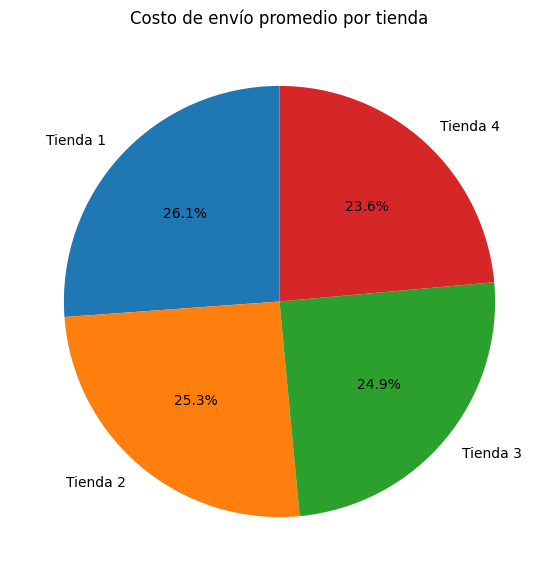

In [62]:

import matplotlib.pyplot as plt

envios = [envio_tienda, envio_tienda2, envio_tienda3, envio_tienda4]
labels = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(7,7))
plt.pie(envios, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Costo de envío promedio por tienda")
plt.gca().set_aspect('equal')
plt.show()

Informe Final — Resumen del Análisis

El objetivo del análisis fue comparar el desempeño de las cuatro tiendas del Sr. Juan para determinar cuál de ellas conviene vender. Se evaluaron los ingresos totales, ventas por categoría, calificaciones promedio, productos más y menos vendidos y costos de envío.

1. Ingresos Totales

La Tienda 1 es la que más factura, tal como se mostro en gráficos anteriores, seguida por las tiendas 2 y 3.
La Tienda 4 es la que genera menores ingresos.

2. Ventas por Categoría

Las cuatro tiendas muestran un patrón muy similar.
Las categorías más fuertes son Electrónicos, Electrodomésticos y Muebles.
La Tienda 2 se destaca en Electrodomésticos e Instrumentos Musicales, y la Tienda 3 en Muebles y Deportes.

3. Calificación Promedio

Las Tiendas 2 y 3 tienen las mejores calificaciones (alrededor de 4.05).
Todas las tiendas mantienen un buen nivel de satisfacción.

4. Productos Más y Menos Vendidos

La rotación es similar en todas las tiendas.
No hay anomalías que afecten la decisión final.

5. Costo de Envío Promedio

La Tienda 4 tiene el costo de envío más bajo.
Sin embargo, esta ventaja no compensa sus ingresos reducidos.

**Conclusión Final**

La recomendación es vender la Tienda 4.

Motivos principales:

Es la tienda con menores ingresos.

No destaca en ninguna categoría relevante.

Su calificación es correcta, pero no superior.

Aunque tiene el costo de envío más eficiente, no logra compensar su bajo desempeño general.

**En resumen:
La Tienda 4 es la opción más lógica para vender, ya que es la menos rentable y su salida no afecta el rendimiento del resto del negocio.**

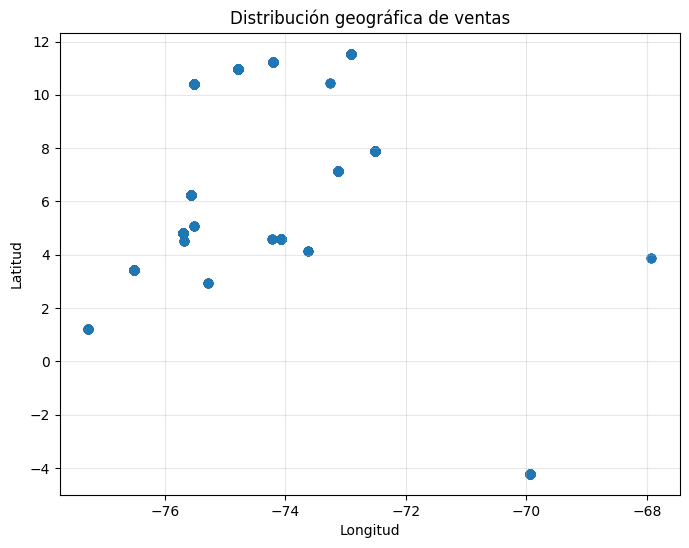

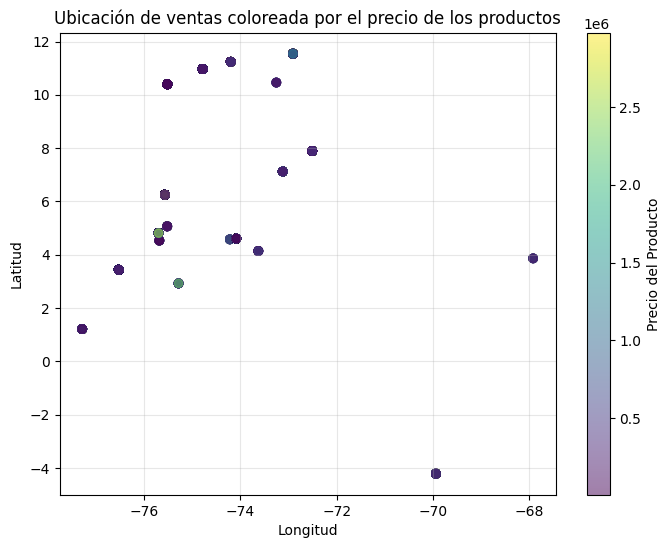

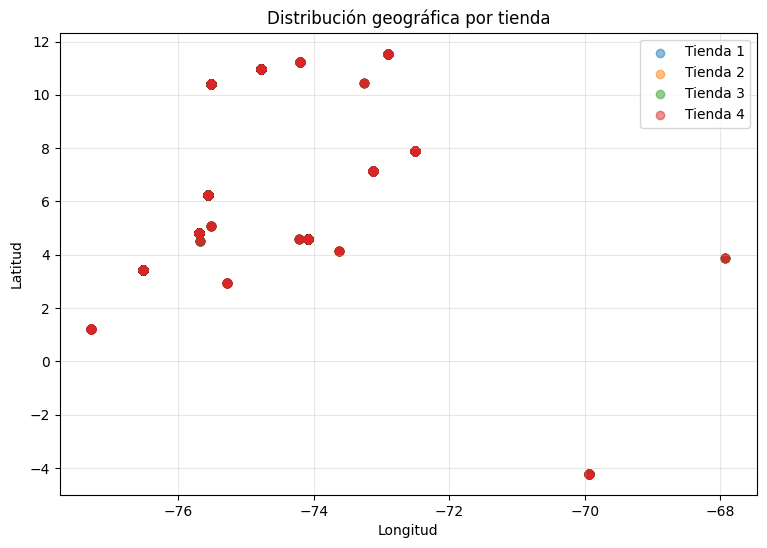

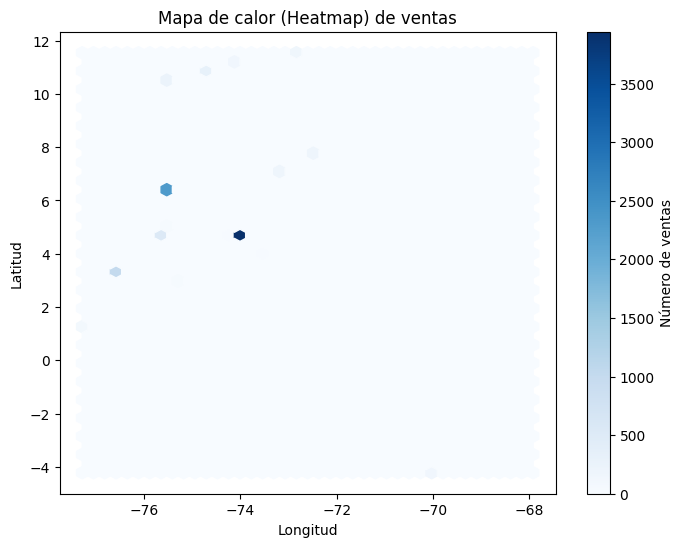

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Todas las tiendas en un solo DF
dfs = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# DF sin columna "Tienda"
df = pd.concat(dfs, ignore_index=True)

# DF con columna "Tienda"
df_con_tienda = pd.concat(
    [df_i.assign(Tienda=nombre) for df_i, nombre in zip(dfs, nombres)],
    ignore_index=True
)

# Scatter general
plt.figure(figsize=(8, 6))
plt.scatter(df['lon'], df['lat'], alpha=0.4)
plt.title('Distribución geográfica de ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(alpha=0.3)
plt.show()
plt.close()

# Scatter precio
plt.figure(figsize=(8, 6))
plt.scatter(df['lon'], df['lat'], c=df['Precio'], alpha=0.5, cmap='viridis')
plt.title('Ubicación de ventas coloreada por el precio de los productos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Precio del Producto')
plt.grid(alpha=0.3)
plt.show()
plt.close()

# Scatter tienda
plt.figure(figsize=(9, 6))

for tienda_nombre in df_con_tienda['Tienda'].unique():
    subset = df_con_tienda[df_con_tienda['Tienda'] == tienda_nombre]
    plt.scatter(subset['lon'], subset['lat'], alpha=0.5, label=tienda_nombre)

plt.title('Distribución geográfica por tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
plt.close()

# Heatmap con hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(df['lon'], df['lat'], gridsize=40, cmap='Blues')
plt.title('Mapa de calor (Heatmap) de ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Número de ventas')
plt.show()
plt.close()